In [ ]:
!pip install pmdarima==1.2.1

     |████████████████████████████████| 921kB 11.4MB/s 
     |████████████████████████████████| 24.8MB 1.6MB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.2.3 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.2.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np


In [2]:
  #All the stock market abbrevations used for companies   
stocks = {'AXP':'American Express Financial services',
'AAPL':'Apple Technology',
'AMZN':'Amazon.com E-commerce',
'ADBE':'Adobe Computer software',
'ADS':'Alliance Data Systems Corporation',
'BA':'Boeing Aerospace',
'BAC':'Bank of America Investment banking',
'CAT':'Caterpillar Inc. Construction machinery and equipment',
'CVX':'Chevron Corporation Oil industry',
'CSCO':'Cisco Systems Networking hardware',
'COST':'Costco Retail',
'DIS':'The Walt Disney Company Mass media',
'FB':'Facebook Social Media',
'GE':'General Electric Multinational conglomerate',
'GS':'Goldman Sachs Investment banking',
'GOOGL':'Alphabet Inc. Multinational conglomerate',
'HD':'The Home Depot Home improvement',
'HDB':'HDFC Bank Financial services',
'HOG':'Harley:Davidson motorcycle manufacturer',
'IBM':'IBM Computer hardware',
'INTC':'Intel Semiconductor',
'INFY':'Infosys Information technology consulting',
'JNJ':'Johnson & Johnson Medical device',
'JPM':'JPMorgan Chase Investment banking',
'JBHT':'J.B. Hunt Transportation and Logistics',
'KO':'The Coca:Cola Company Beverages',
'KEX':'Kirby Corporation Transportation',
'MCD':"McDonald's Fast food",
'MSFT':'Microsoft Corporation Technology',
'MMM':'3M Multinational conglomerate',
'MRK':'Merck & Co. Pharmaceutical',
'NFLX':'Netflix Production',
'NKE':'Nike Footwear manufacturing',
'NVDA':'Nvidia Computer Hardware and Software', 
'PFE':'Pfizer Pharmaceutical',
'PG':'Procter & Gamble Consumer Goods',
'PEP':'PepsiCo Food',
'REGN':'Regeneron Pharmaceuticals Biotechnology',
'SBUX':'Starbucks Coffeehouse',
'TRV':'The Travelers Companies Insurance',
'TGT':'Target Corporation Retail',
'T':'AT&T Telecommunications',
'UTX':'Raytheon Technologies Corporation Aircraft manufacturing',
'UNH':'UnitedHealth Group Managed care',
'UPS':'United Parcel Service Logistics',
'UNP':'Union Pacific Corporation Transport',
'VZ':'Verizon Communications Telecommunications',
'WMT':'Walmart Retail',
'XOM':'ExxonMobil multinational oil and gas',
'YUM':'Yum! Brands Fast food'}


In [31]:
# path=r"C:\Users\Hi\Desktop\Finpros\NASDAQ_stock_analysis\data\AMZN_2006-01-01_to_2020-09-30.csv"
#   #reading dataset by indexing 'Date' column for ARIMA function properly
# data = pd.read_csv(path, index_col='Date', parse_dates=['Date'])
  #droping column
data = pd.read_csv('new.csv')
data = data.dropna()
data = data['Price Change']
data

0      0.22
1      0.38
2     -0.15
3      0.00
8     -0.41
       ... 
722   -0.40
723    0.00
724    0.60
727    0.00
728    0.70
Name: Price Change, Length: 499, dtype: float64

In [32]:
  #changing dataset to log(dataset) values
# data = np.log(data)
# data = np.array(data)
  #splitting dataset for train and test
train_data, test_data = data[3:int(len(data)*0.9)], data[int(len(data)*0.9):]

In [33]:
  #calculating p,d,q values for ARIMA based on training data 
  #auto_arima process identifies the most optimal parameters for an ARIMA model
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       #type of root test
                      max_p=4, max_q=4, #max_p is the max value of AR and max_q is the max value of MA
                      m=1,              #annual data
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
#summary to choose p,d,q value and update it accordingly in arima function
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1063.565, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1057.664, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1057.721, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1059.621, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1059.636, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1061.510, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1057.898, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.379 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  446
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -526.832
Date:                Tue, 02 Jul 2024   AIC                           1057.664
Time:                        22:28:31   BIC                           1065.865
Sample:                

In [34]:
  #using the predicted p,d,q value from above result to train the arima model
model = ARIMA(train_data, order=(10, 1, 2))  
  #fits model by exact maximum likelihood
fitted = model.fit()  
print(fitted.summary())

c:\Users\Hi\anaconda3\envs\all\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hi\anaconda3\envs\all\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hi\anaconda3\envs\all\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Price Change   No. Observations:                  446
Model:                ARIMA(10, 1, 2)   Log Likelihood                -525.794
Date:                Tue, 02 Jul 2024   AIC                           1077.588
Time:                        22:28:32   BIC                           1130.862
Sample:                             0   HQIC                          1098.595
                                - 446                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9393      0.426     -2.207      0.027      -1.773      -0.105
ar.L2         -0.1085      0.077     -1.411      0.158      -0.259       0.042
ar.L3          0.0282      0.060      0.471      0.6

c:\Users\Hi\anaconda3\envs\all\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


c:\Users\Hi\anaconda3\envs\all\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hi\anaconda3\envs\all\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


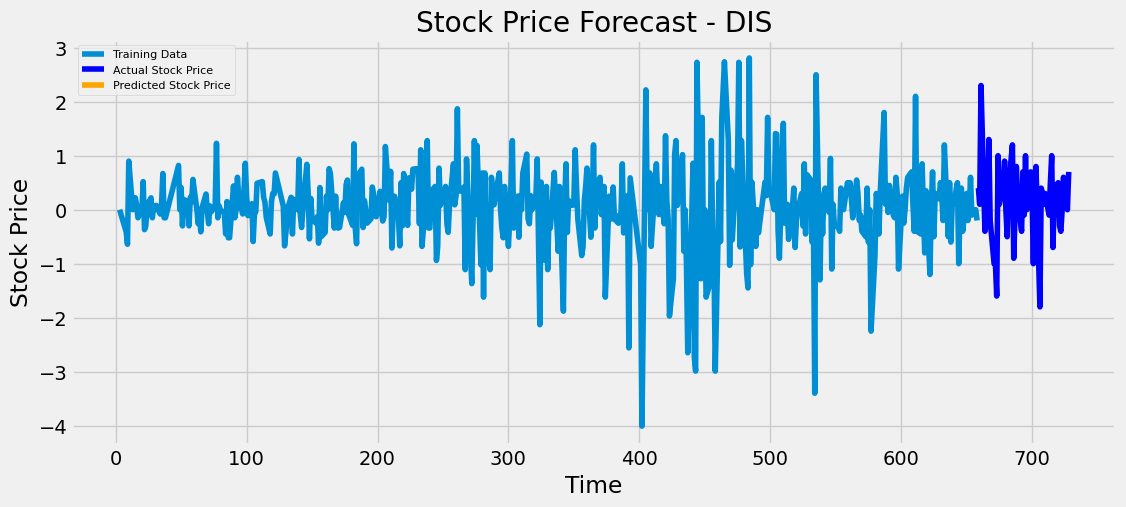

In [37]:
# Assuming fitted is your ARIMA model already trained on train_data
# test_data is the actual test data you want to forecast
forecast_values = fitted.forecast(len(test_data))

# Extract forecasted values and confidence intervals directly from the returned values
fc_series = pd.Series(forecast_values, index=test_data.index)
# If applicable, compute confidence intervals based on forecast_values

# Plotting the forecasted data with the original data in the same graph
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data, label='Training Data')
plt.plot(test_data, color='blue', label='Actual Stock Price')
plt.plot(fc_series, color='orange', label='Predicted Stock Price')
# Add confidence interval plotting if applicable

plt.title('Stock Price Forecast - DIS')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [42]:
fitted.forecast(len(test_data))

c:\Users\Hi\anaconda3\envs\all\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


446    0.125266
447   -0.029253
448    0.078716
449    0.066372
450    0.007908
451    0.035662
452    0.059594
453    0.044430
454    0.050150
455    0.036955
456    0.055077
457    0.027232
458    0.055739
459    0.036796
460    0.047950
461    0.038131
462    0.047587
463    0.039659
464    0.045528
465    0.041713
466    0.045091
467    0.041110
468    0.045274
469    0.041627
470    0.044659
471    0.042002
472    0.044487
473    0.042173
474    0.044147
475    0.042561
476    0.043876
477    0.042707
478    0.043768
479    0.042832
480    0.043634
481    0.042941
482    0.043562
483    0.042997
484    0.043501
485    0.043063
486    0.043442
487    0.043110
488    0.043404
489    0.043145
490    0.043371
491    0.043175
492    0.043346
493    0.043195
494    0.043329
495    0.043211
Name: predicted_mean, dtype: float64

c:\Users\Hi\anaconda3\envs\all\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hi\anaconda3\envs\all\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


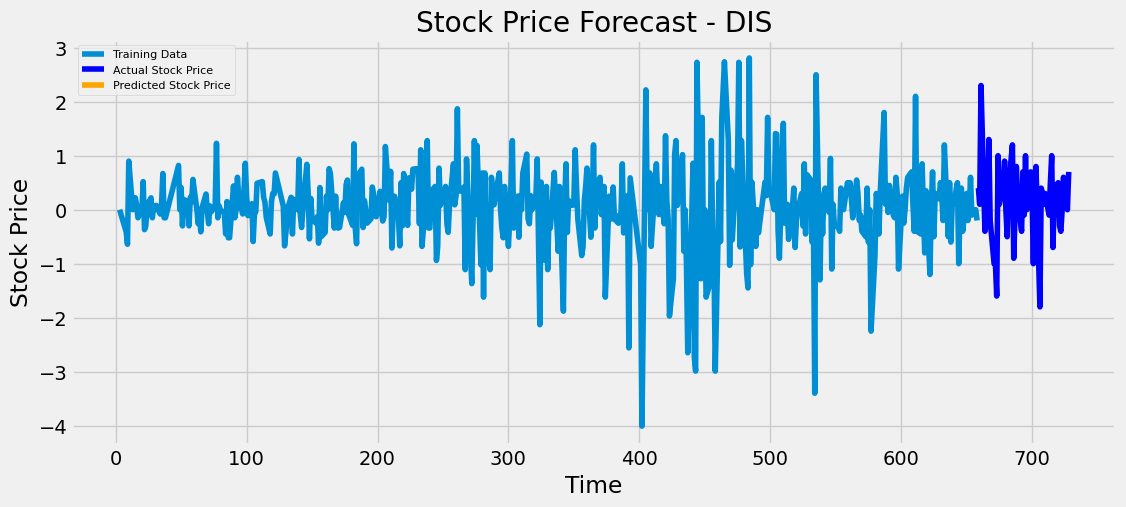

In [35]:
forecast_values = fitted.forecast(len(test_data))

# Extract forecasted values and confidence intervals directly from the returned values
fc_series = pd.Series(forecast_values, index=test_data.index)
# If applicable, compute confidence intervals based on forecast_values

# Plotting the forecasted data with the original data in the same graph
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data, label='Training Data')
plt.plot(test_data, color='blue', label='Actual Stock Price')
plt.plot(fc_series, color='orange', label='Predicted Stock Price')
# Add confidence interval plotting if applicable

plt.title('Stock Price Forecast - DIS')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [36]:
# Generate error data
  #mean squared error
mse = mean_squared_error(test_data, forecast_values)
print('MSE: '+str(mse))
  #mean absolute error
mae = mean_absolute_error(test_data, forecast_values)
print('MAE: '+str(mae))
  #root mean squared error
rmse = math.sqrt(mean_squared_error(test_data, forecast_values))
print('RMSE: '+str(rmse))
  #mean absolute percentage error
mape = np.mean(np.abs(forecast_values - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.556220256036592
MAE: 0.5714576391616903
RMSE: 0.7458017538438697
MAPE: nan
